Import some functions from the python standard library, numpy, and ipython. This will set up our computing environment.

In [1]:
%pylab inline
# import some functions from python's random module - these will
# be used in the modeling process
from random import choice, random
# import some math functions from the numpy library (note that this
# isn't part of the python standard library)
from numpy import log10, average

from skbio import DNA, Alignment

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Define an ``evolve_seq`` function. This takes a parent sequence, and returns two child 
# sequences to simulate a possible speciation event, where each input sequence (representing 
# a parent's genetic sequence) has diverged into two child sequences (representing the new 
# species, and incurring point mutations along the way). 

def evolve_seq(sequence,
               substitution_probability,
               mutation_choices=['A','C','G','T']):
    """Return two child sequences simulating point mutations

       An error occurs with probability substitution_probability
        independently at each position of each child sequence.
    """
    # Generate two lists for storing the resulting sequences
    r1 = []
    r2 = []

    for base in sequence:
        if random() < substitution_probability:
            # a point mutation will occur at this position
            # what's wrong with the following statement?
            r1.append(choice(mutation_choices))
        else:
            # no point mutation at this position
            r1.append(base)
        if random() < substitution_probability:
            # a point mutation will occur at this position
            # what's wrong with the following statement?
            r2.append(choice(mutation_choices))
        else:
            # no point mutation at this position
            r2.append(base)
    # convert the lists to strings and return them
    return DNA(''.join(r1), id='%s;1' % sequence.id), DNA(''.join(r2), id='%s;2' % sequence.id)

def simplistic_sequence_simulation(root_sequence, generations, substitution_probability=0.01, verbose=False):
    # initial some values and perform some basic error checking
    assert generations > 0, "Must simulate one or more generations."
    # can you simplify the following test?
    for base in root_sequence:
        assert base != 'A' or base != 'C' or base != 'G' or base != 'T',\
         "Invalid base identified: %s. Only A, C, G, or T are allowed." % base
    # initialize a list of the previous generation's sequences - this gets used
    # in the for loop below. since we'll start with the first generation of
    # children, root_sequence is the previous generation's sequence
    previous_generation_sequences = [root_sequence]

    # iterate over each generation
    for i in range(1,generations+1):
        # create a list to store the current generation of sequences
        current_generation_sequences = []
        # iterate over the sequences of the previous generation
        for parent_sequence in previous_generation_sequences:
            # evolve two child sequences
            r1, r2 = evolve_seq(parent_sequence,
                                substitution_probability=substitution_probability)
            # add the new sequence to the list of this generation's sequences
            current_generation_sequences.append(r1)
            current_generation_sequences.append(r2)
        previous_generation_sequences = current_generation_sequences

    # upon completion of all generations, return the last generation's sequences
    return Alignment(previous_generation_sequences)


In [7]:
sequence_length = 100

root_sequence = []
for i in range(int(sequence_length)):
    root_sequence.append(choice(list('ACGT')))
root_sequence = DNA(''.join(root_sequence), id='root')

sc_foundation = simplistic_sequence_simulation(root_sequence, generations=3, substitution_probability=0.05)

root_sequence = []
for i in range(int(sequence_length)):
    root_sequence.append(choice(list('ACGT')))
root_sequence = DNA(''.join(root_sequence), id='root')
sc_extension1 = simplistic_sequence_simulation(root_sequence, generations=3, substitution_probability=0.35)
sc_extension2 = simplistic_sequence_simulation(root_sequence, generations=3, substitution_probability=0.35)

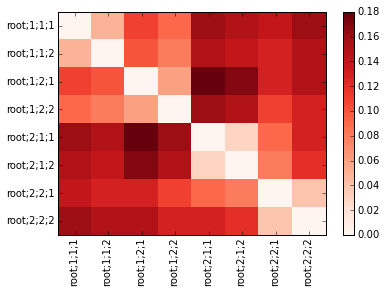

In [13]:
_ = sc_foundation.distances().plot(cmap='Reds')

In [20]:
sc_foundation_distances = sc_foundation.distances()
sc_foundation_distances.ids

('root;1;1;1',
 'root;1;1;2',
 'root;1;2;1',
 'root;1;2;2',
 'root;2;1;1',
 'root;2;1;2',
 'root;2;2;1',
 'root;2;2;2')